In [4]:
import pandas as pd

from tresearcher.tabular.pipeline import *
from tresearcher.tabular.experiment import *
from tresearcher.researcher.records import *

import matplotlib.pyplot as plt

In [6]:
PIPELINES["bid_mean_enc_reduce"] = Pipeline(
[
    agg_proc(["building_id"], "meter_reading", ["mean"], fill_missing=True),
    agg_proc(["building_id", "meter"], "meter_reading", ["mean"], fill_missing=True), 
    agg_proc(["building_id", "meter", "hour"], "meter_reading", ["mean"], fill_missing=True), 
    agg_proc(["building_id", "meter", "weekday"], "meter_reading", ["mean"], fill_missing=True), 
    
], ["meter_reading"])


def extract_date_feats(df, idx, target):
    df["hour"] = df["timestamp"].dt.hour
    df["weekday"] = df["timestamp"].dt.dayofweek
    
    return df, None

PIPELINES["log_drop"] = Pipeline([
    lambda df, idx, target: (df[df["meter_reading"] < 60000].reset_index(drop=True), None),
    make_datetime_proc("timestamp"),
    extract_date_feats,
    target_log1n_proc,
    reduce_proc(["building_id", "meter", "hour", "weekday", "meter_reading"]),
],
["meter_reading"])

PIPELINES["log_drop30000"] = Pipeline([
    lambda df, idx, target: (df[df["meter_reading"] < 30000].reset_index(drop=True), None),
    make_datetime_proc("timestamp"),
    extract_date_feats,
    target_log1n_proc,
    reduce_proc(["building_id", "meter", "hour", "weekday", "meter_reading"]),
],
["meter_reading"])

In [7]:
# trn = pd.read_csv("data/train.csv")
# subset = trn.sample(3000).reset_index()

In [8]:
# df, rescaler = PIPELINES["log_drop"].apply(subset, None)

In [9]:
params = {
    "title": "test",
    "notes": " some human readable sentence",
    "model": "xgb",
    "path": "data/train.csv",
    "folds": 5,
    "pipeline": "log_drop30000",
    "fold_pipeline": "bid_mean_enc_reduce",
    "metrics": ["mse", "rmsle"],                                                       
    "x_cols": [
        "building_id_wise_meter_reading_mean", 
        "building_id-meter_wise_meter_reading_mean", 
        "building_id-meter-hour_wise_meter_reading_mean", 
        "building_id-meter-weekday_wise_meter_reading_mean", 
        "meter"
    ],
    "y_cols": ["meter_reading"],
    # XGBOOST Parameters
    "tree_method": "gpu_hist"
}

In [10]:
res = run_experiment(params, "records/")

running experiment dce972579afee866fa3b3e56888bce80

--------- Starting fold 0 ---------
--------- Starting fold 1 ---------
--------- Starting fold 2 ---------
--------- Starting fold 3 ---------
--------- Starting fold 4 ---------


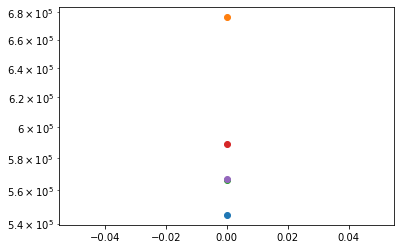

In [8]:
res = past_experiment_from_hash("records/", "dce972579afee866fa3b3e56888bce80").results
fig, ax = plt.subplots()
ax.set_yscale("log")


for fold in res.get_metric("mse"):
    ax.scatter(0, np.array(fold))

In [10]:
res.get_metric("rmsle")

[[1.198615363107795],
 [1.2825325343128569],
 [1.245338609843404],
 [1.248923113030528],
 [1.2777612835229597]]

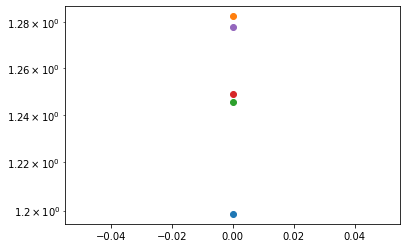

In [9]:
res = past_experiment_from_hash("records/", "dce972579afee866fa3b3e56888bce80").results
fig, ax = plt.subplots()
ax.set_yscale("log")


for fold in res.get_metric("rmsle"):
    ax.scatter(0, np.array(fold))

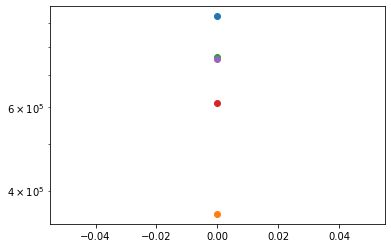

In [8]:
res = past_experiment_from_hash("records/", "ee586b4c55698d5ce1b39dd878b477a2").results
fig, ax = plt.subplots()
ax.set_yscale("log")


for fold in res.get_metric("mse"):
    ax.scatter(0, np.array(fold))

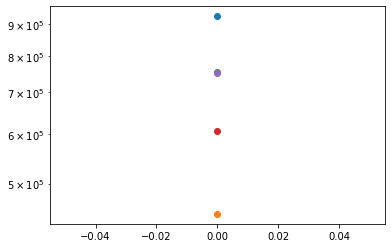

In [37]:
res = past_experiment_from_hash("records/", "87d235f2fbd2f0045aaf1f2de53de075").results
fig, ax = plt.subplots()
ax.set_yscale("log")


for fold in res.get_metric("mse"):
    ax.scatter(0, np.array(fold))

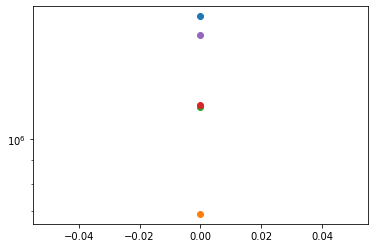

In [28]:
res = past_experiment_from_hash("records/", "afd8eab42a9f626497c245f85ac05c44").results
fig, ax = plt.subplots()
ax.set_yscale("log")


for fold in res.get_metric("mse"):
    ax.scatter(0, np.array(fold))

In [11]:
np.log(0.0000001)

-16.11809565095832

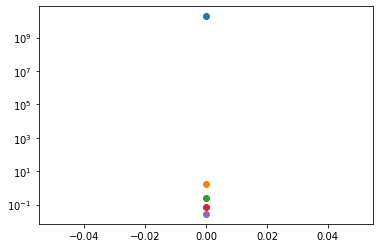

In [12]:
res = past_experiment_from_hash("records/", "6cdaf144eaab115080b6cb5404e3cbbe").results
fig, ax = plt.subplots()
ax.set_yscale("log")


for fold in res.get_metric("mse"):
    ax.scatter(0, np.array(fold))